<font color=green> Привет еще раз. Спасибо, что доделал работу. Мои комментарии к исправленным замечаниям будут выделены зеленым цветом. Если же потребуется доработка некоторых пунктов проекта, то я отмечу это <font color=red>красным цветом. 
    
---

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Комментарий наставника</h1>

Привет! Спасибо, что прислал задание:) Поздравляю с первым сданным проектом. Мои комментарии обозначены пометкой **Комментарий наставника**. Далее в файле ты сможешь найти их в похожих ячейках (если рамки комментария зелёные - всё сделано правильно; оранжевые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange">Комментарий наставника</h1>

Стоит делать краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить краткий план того, что надо сделать (если этот план имеется), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.
    

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

In [1]:
import pandas as pd
debts = pd.read_csv('/datasets/data.csv')

In [2]:
debts.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод

В таблице имеются следующие данные:

children — количество детей в семье

days_employed — общий трудовой стаж в днях

dob_years — возраст клиента в годах

education — уровень образования клиента

education_id — идентификатор уровня образования

family_status — семейное положение

family_status_id — идентификатор семейного положения

gender — пол клиента

income_type — тип занятости

debt — имел ли задолженность по возврату кредитов

total_income — ежемесячный доход

purpose — цель получения кредита


Я считаю, что пропуски могут возникнуть по нескольким причинам. Первая, на мой взгляд, это человеческий фактор (не захотел заполнять, пропустил и тд.). Вторая причина - системная. Возможно программа-обработчик данных не смогла прочесть данные.

Поэтому я считаю, что пропуски не случайны. С ними надо разбираться, возможно, что совместно с дата инженерами.


<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange">Комментарий наставника</h1>

У меня имеется несколько комментариев по данному шагу:
- желательно выводить около 10 строчек таблицы. Меньше не рекомендуется, можно не увидеть структуру данных;
- считывание данных и импорт необходимых библиотек лучше проводить в разных ячейках;
- Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет.

Первый взгляд на таблицу выполнен.

### Шаг 2. Предобработка данных

### Обработка пропусков

In [3]:
debts['total_income'] = debts['total_income'].fillna(0)
debts_income = debts[debts['total_income'] > 0]

In [4]:
def income_add(row):
    income_median = debts_income[debts_income['income_type'] == row['income_type']]['total_income'].median()
    if row['total_income'] == 0:
        return income_median
    else:
        return row['total_income']

In [5]:
debts['total_income_new'] = debts.apply(income_add, axis = 1)
debts = debts.fillna(0)
debts.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_new
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,253875.639453
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,112080.014102
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,145885.952297
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,267628.550329
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,158616.077870
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,255763.565419
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,240525.971920
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,135823.934197
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,95856.832424
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,144425.938277


### Вывод

Посчитал медиану для столбца income_type через функции. Теперь там более адекватные и соответствующие реальности значения.

По поводу days_employed решил пока заполнить 0. Как нам говорит в Slack наставник, "этот столбец ни на что не влияет".

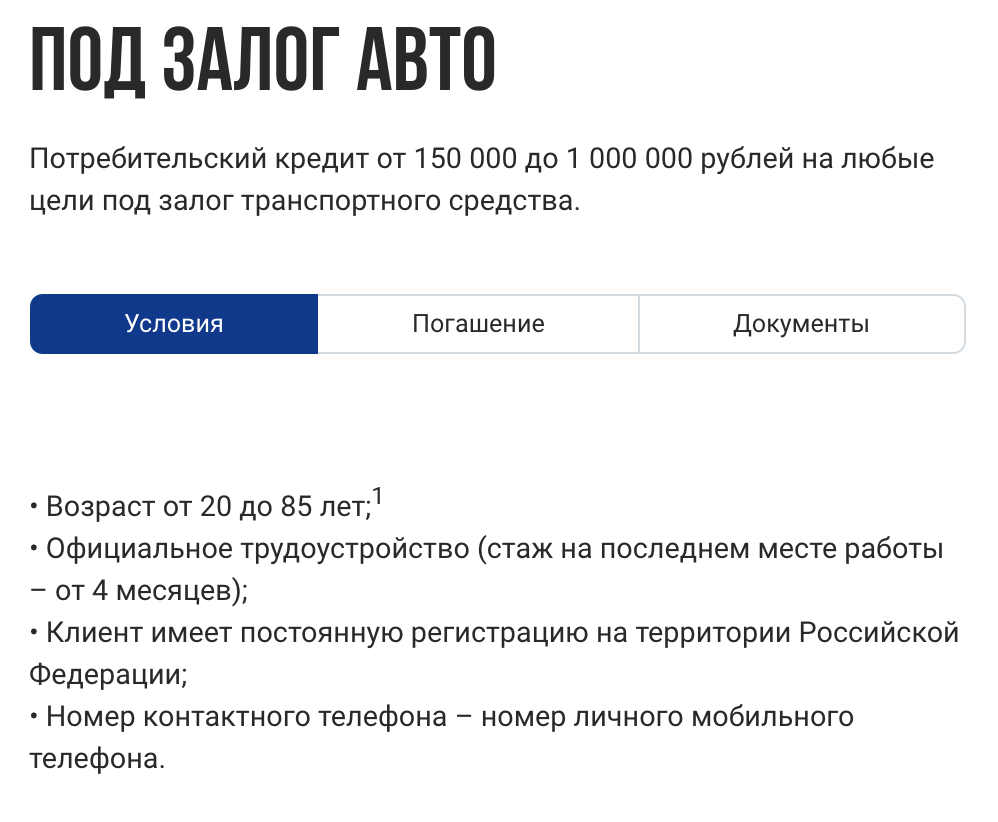

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red">Комментарий наставника</h1>
    
Для получения такого кредита надо иметь стаж. Лучше использовать заполнение пропусков в соответствии с типом дохода. Тогда пенсионеры будут получать также, как и другие пенсионеры и т.д. Все-таки в данных есть достаточное число групп, заполнять пропуски в стаже, скажем, у студентов и пенсионеров одним и тем же значением не очень то правильно. То же самое касается и столбца с доходами: пропуски у предпринимателя и пенсионера заполняются одним числом, что вызывает вопросы. Подумай, как лучше обработать пропуски.

Да, не подумал о таком варианте :( 

Мне показалось, что высшеуказанные пропуски появились по причине того, что люди либо только устроились на работу, либо 
взяли кредит под залог имущества, или же не успели принести справку. В любом случае у них нет стажа и дохода, 
поэтому и заполнил 0.

<font color=green> Теперь пропуски в столбце доходов обработаны верно. 
    
---

### Замена типа данных

In [6]:
debts['days_employed'] = debts['days_employed'].astype('int')
debts['total_income'] = debts['total_income'].astype('int')
print(debts.info())

#print(debts.head())

#debts_plus = debts[debts['days_employed'] > 0]
#debts_minus = debts[debts['days_employed'] < 0]

#print(debts_plus['days_employed'].min(), debts_plus['days_employed'].max())
#print(debts_minus['days_employed'].min(), debts_minus['days_employed'].max())

#print(debts_plus['days_employed'].count())
#print(debts_minus['days_employed'].count())

debts = debts[debts['days_employed'] <= 0]
debts['days_employed'] = debts['days_employed'] * -1
#print(debts.head())
#print(debts['days_employed'].min(), debts['days_employed'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
total_income_new    21525 non-null float64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.1+ MB
None


### Вывод

1. Методом .astype() перевёл данные в столбцах days_employed и total_income.

2. В days_employed есть положительные и отрицательные значения. Проанализировав данные, понял, что в положительных данных ошибка, так как люди не могут так долго жить и работать. В итоге, принял решение отказаться от положительных данных, так как их мало, чтобы получить более достоверную информацию.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Комментарий наставника</h1>

Исходя из общей информации о таблице мы видим, что два столбца имеют вещественный тип данных, который и надо заменить на целочисленный. Это замена произведена верно. Также хорошо бы освоить метод to_numeric() для будущих работ. 

Комментарий: Я сначала пробовал через .to_numeric(), но столбцы как были flat, так и остались. Может я не знаю, какой-то дополнительный метод? Посоветуй, пожалуйста, что почитать по теме.

### Обработка дубликатов

In [10]:
debts['education'] = debts['education'].str.lower()
debts['family_status'] = debts['family_status'].str.lower()
debts['gender'] = debts['gender'].str.lower()
debts['income_type'] = debts['income_type'].str.lower()
debts['purpose'] = debts['purpose'].str.lower()
debts = debts.drop_duplicates().reset_index(drop=True)

print('Значения в столбце education:')
print(debts['education'].unique())
print()
print('Значения в столбце family_status:')
print(debts['family_status'].unique())
print()
print('Значения в столбце gender:')
print(debts['gender'].unique())
print()
print('Значения в столбце income_type:')
print(debts['income_type'].unique())
print()
print('Значения в столбце purpose:')
print(debts['purpose'].unique())
print()

Значения в столбце education:
['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']

Значения в столбце family_status:
['женат / замужем' 'гражданский брак' 'в разводе' 'не женат / не замужем'
 'вдовец / вдова']

Значения в столбце gender:
['f' 'm' 'xna']

Значения в столбце income_type:
['сотрудник' 'компаньон' 'пенсионер' 'госслужащий' 'предприниматель'
 'студент' 'в декрете']

Значения в столбце purpose:
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'операции с жильем' 'образование' 'на проведение свадьбы'
 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'сыграть свадьбу'
 'покупка жилой недвижимости' 'строительство собственной недвижимости'
 'недвижимость' 'строительство недвижимости'
 'на покупку своего автомобиля' 'на покупку подержанного автомобиля'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем

### Вывод

Все данные типа object привёл к единому варианту написания, чтобы упростить дальнеший поиск дубликатов и обработку данных.

Проверка:

1. В столбце gender есть неизвестный пол (XNA).

2. В столбце purpose много похожих значений.

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red">Комментарий наставника</h1>

Это исправление ошибок в данных. Дубликаты - одинаковые строки в данных. Они вызывают смещение финальных результатов, поэтому их и надо удалять. Конечно, в данных нет уникального идентификатора, однако надо уметь удалять дубликаты.

<font color=green> Теперь дубликаты из данных удалены. Все правильно. 
    
---

### Лемматизация

In [45]:
from pymystem3 import Mystem
m = Mystem()

def lemma(row):
    lemma = m.lemmatize(row)
    return lemma

debts['lemma_purp'] = debts['purpose'].apply(lemma)
all_lemmas_list = debts['lemma_purp'].values
flat_lemmas_list = []

for sublist in all_lemmas_list:
    for item in sublist:
        flat_lemmas_list.append(item)
print(all_lemmas_list)

from collections import Counter
print(Counter(flat_lemmas_list))

def dictionary(purpose, data):
    for row in data:
        if purpose == row:
            return row

dict = []
dict.append(dictionary('жилье', flat_lemmas_list))
dict.append(dictionary('недвижимость', flat_lemmas_list))
dict.append(dictionary('образование', flat_lemmas_list))
dict.append(dictionary('автомобиль', flat_lemmas_list))
dict.append(dictionary('свадьба', flat_lemmas_list))


print(dictionary)

[list(['покупка', ' ', 'жилье', '\n'])
 list(['приобретение', ' ', 'автомобиль', '\n'])
 list(['покупка', ' ', 'жилье', '\n']) ... list(['недвижимость', '\n'])
 list(['на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', '\n'])
 list(['на', ' ', 'покупка', ' ', 'автомобиль', '\n'])]
Counter({' ': 28298, '\n': 18080, 'недвижимость': 5357, 'покупка': 4979, 'жилье': 3781, 'автомобиль': 3600, 'образование': 3368, 'с': 2455, 'операция': 2197, 'свадьба': 1974, 'свой': 1912, 'на': 1868, 'строительство': 1571, 'высокий': 1161, 'коммерческий': 1103, 'получение': 1094, 'для': 1085, 'жилой': 1036, 'сделка': 791, 'заниматься': 773, 'дополнительный': 747, 'проведение': 651, 'сыграть': 647, 'сдача': 551, 'семья': 534, 'собственный': 533, 'со': 533, 'ремонт': 521, 'подержанный': 410, 'подержать': 395, 'приобретение': 385, 'профильный': 366})
<function dictionary at 0x7f3b867da290>


### Вывод

Основные цели для взятия кредита: жильё, учёба, автомобиль и свадьба.
Далее создал словари, которые можно потом будет обновлять и пополнять по мере необходимости

---
<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Комментарий наставника</h1>

Все верно, метод lemmatize() использован правильно. Выбор лемм объяснен. 

### Категоризация данных

In [46]:
#print(df.head())
#print(df.info())

def category(data):
    if dict[0] in data:
        return dict[0]
    elif dict[1] in data:
        return dict[1]
    elif dict[2] in data:
        return dict[2]
    elif dict[3] in data:
        return dict[3]
    else:
        return dict[4]


debts['category_purpose'] = debts['lemma_purp'].apply(category)
debts.loc[:, ['purpose', 'category_purpose']] .head(15)
debts['quant_income'] = pd.qcut(debts['total_income'], q=4)
debts.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_new,lemma_purp,category_purpose,quant_income
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья,253875.639453,"[покупка, , жилье, \n]",жилье,"(199825.5, 2265604.0]"
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля,112080.014102,"[приобретение, , автомобиль, \n]",автомобиль,"(90552.75, 138848.5]"
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья,145885.952297,"[покупка, , жилье, \n]",жилье,"(138848.5, 199825.5]"
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование,267628.550329,"[дополнительный, , образование, \n]",образование,"(199825.5, 2265604.0]"
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,0,255763,покупка жилья,255763.565419,"[покупка, , жилье, \n]",жилье,"(199825.5, 2265604.0]"
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,0,240525,операции с жильем,240525.971920,"[операция, , с, , жилье, \n]",жилье,"(199825.5, 2265604.0]"
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823,образование,135823.934197,"[образование, \n]",образование,"(90552.75, 138848.5]"
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856,на проведение свадьбы,95856.832424,"[на, , проведение, , свадьба, \n]",свадьба,"(90552.75, 138848.5]"
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425,покупка жилья для семьи,144425.938277,"[покупка, , жилье, , для, , семья, \n]",жилье,"(138848.5, 199825.5]"
10,2,4171,36,высшее,0,женат / замужем,0,m,компаньон,0,113943,покупка недвижимости,113943.491460,"[покупка, , недвижимость, \n]",недвижимость,"(90552.75, 138848.5]"


### Вывод

Были использованы словари из задания с лемматизацией. Жильё и недвижимость были разделены по разным словарям, так как важно сохранить назначение, то есть жильё некоммерческое, а недвижимость коммерческая

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange">Комментарий наставника</h1>

Категоризовать надо и столбец с доходами. Это есть ниже, а должно быть в данном разделе. 


### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange">Комментарий наставника</h1>

Категоризовать данные по числу детей необязательно. Разбиение есть уже в исходных данных. Все-таки разница в возврате кредита у семей с одним ребенком или тремя детьми будет.


Вопрос, на мой взгляд, заключался в том, что есть ли дети или нет, поэтому делал в таком ключе.

In [47]:
debts_w_kids = debts[debts['children'] != 0]
debts_wo_kids = debts[debts['children'] == 0]

w_kids_debit = debts_w_kids['debt'].sum() / len(debts_w_kids)
wo_kids_debit = debts_wo_kids['debt'].sum() / len(debts_wo_kids)

print('Кредиторы с детьми, у которых была задолженность: {:.1%}'.format(w_kids_debit))
print('Кредиторы без детей, у которых была задолженность: {:.1%}'.format(wo_kids_debit))

Кредиторы с детьми, у которых была задолженность: 9.4%
Кредиторы без детей, у которых была задолженность: 8.1%


### Вывод

Кредиторы с детьми чаще берут в долг.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [48]:
print('Типы семейного положения и id:')
print(debts['family_status'].unique())
print(debts['family_status_id'].unique())
print()

data_pivot_family_status = debts.pivot_table(index='family_status', columns='debt', values='family_status_id', aggfunc='count')
data_pivot_family_status['ratio %'] = (data_pivot_family_status[1] / data_pivot_family_status[0]) * 100
data_pivot_family_status['ratio %'] = data_pivot_family_status['ratio %'].astype('int')
data_pivot_family_status['sum'] = data_pivot_family_status[1] + data_pivot_family_status[0]


print(data_pivot_family_status.loc[:, ['ratio %', 'sum']])


Типы семейного положения и id:
['женат / замужем' 'гражданский брак' 'в разводе' 'не женат / не замужем'
 'вдовец / вдова']
[0 1 3 4 2]

debt                   ratio %    sum
family_status                        
в разводе                    8    997
вдовец / вдова               6    476
гражданский брак            11   3600
женат / замужем              8  10507
не женат / не замужем       11   2500


### Вывод

Из таблицы видно, что кредиторы, которые никогда не были в официальном браке, более склонны к задолжностям.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Комментарий наставника</h1>

Вывод не противоречит полученному результату. Таблицы на печать выводи с помощью метода display. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [49]:
print()

#print(debts.loc[:, ['total_income', 'quant_income']] .head(15))

data_pivot_income = debts.pivot_table(index='quant_income', columns='debt', values='total_income', aggfunc='count')
data_pivot_income['ratio %'] = (data_pivot_income[1] / data_pivot_income[0]) * 100
data_pivot_income['ratio %'] = data_pivot_income['ratio %'].astype('int')
data_pivot_income['sum'] = data_pivot_income[1] + data_pivot_income[0]

print(data_pivot_income.loc[:, ['ratio %', 'sum']])


debt                   ratio %   sum
quant_income                        
(-0.001, 90552.75]           9  4520
(90552.75, 138848.5]        10  4520
(138848.5, 199825.5]        10  4520
(199825.5, 2265604.0]        7  4520


### Вывод

Из таблицы видно что те люди кто имеет заработок выше среднего более склонны к задолжностям:

50-250 тысяч рублей в месяц - 9-10% с задолжностями

До 50 и свыше 250 тысяч рублей в месяц - 7% с задолжностями

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red">Комментарий наставника</h1>

Исходя из чего выбран именно такой способ категоризации столбца с доходами? Не во всех группах содержится достаточное число клиентов для построения по ним надежных выводов. Лучше использовать разбиение по квантилям данных (метод qcut). Или же можно узнать в интернете процентный состав общества по доходам и затем уже категоризовать столбец с доходами по найденному соотношению с помощью персентилей. 
    
Посмотри на результаты при другом способе категоризации. 

Я использовал метод qcut (прочитал здесь - https://pbpython.com/pandas-qcut-cut.html), но результат получился немного не тот, который я ожидал.
Судя по всему, он разбил просто на идеально равные доли или я чего-то не понимаю :(

<font color=green> qcut разбивает на квантили, да. Все группы получаются равного размера. 
    
---

- Как разные цели кредита влияют на его возврат в срок?

In [50]:
data_pivot_purpose = debts.pivot_table(index='category_purpose', columns='debt', values='purpose', aggfunc='count')

data_pivot_purpose['ratio %'] = (data_pivot_purpose[1] / data_pivot_purpose[0]) * 100
data_pivot_purpose['ratio %'] = data_pivot_purpose['ratio %'].astype('int')

data_pivot_purpose['sum'] = data_pivot_purpose[1] + data_pivot_purpose[0]

print(data_pivot_purpose.loc[:, ['ratio %', 'sum']])

debt              ratio %   sum
category_purpose               
автомобиль             11  3600
жилье                   7  3781
недвижимость            8  5357
образование            10  3368
свадьба                 9  1974


### Вывод

Кредиторы с более мелкими целиями больше склонны к задолженностям.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Комментарий наставника</h1>

Здорово, что при анализе использован метод сводных таблиц. Он пригодится в дальнейших проектах.

Выводы верные по всем пунктам. Пытайся объяснять получаемый результат. 

### Шаг 4. Общий вывод

В ходе данной работы, нужно было разобраться в статистике платёжеспособности клиентов и понять, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Из выше указанных исследований видно, что более надежными оказались люди, которые были или состоят в браке (их процент не превышает 8), имеют ЗП до 50 и свыше 250 тысяч рублей в месяц (в этих категориях лишь 7% имеют задолженность) и с более масштабной целью кредита, например жилье или недвижимость (их процент тоже не превышает 8)


<font color=green> Вывол стал лучше. Приведены ответы на главные вопросы проекта. 
    
---

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red">Комментарий наставника</h1>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.


<font color=green> Помарки исправлены, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange">Комментарий наставника</h1>

- В начале работы следует описывать данные, с которыми работаешь;
- Используй альтернативный способ обработки пропусков;
- Удали дубликаты из данных;
- Категоризацию по доходу стоит делать иначе. Смотри данный пункт подробнее;
- Финальный вывод стоит писать подробно.

Ты проделал большую работу, молодец! Исправь отмеченные тут замечания, и получится очень достойная работа :)

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

Все пункты выполнены. У меня почему-то нет чек-листа как такого

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Комментарий наставника</h1>

Если нужен, то держи)


- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.